In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("TaxiFare.csv")

In [3]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
data.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [6]:
data.describe(include='all')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [7]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [8]:
data.shape

(50000, 8)

In [9]:
data=data[data["amount"] >= 0]

In [10]:
len(data)

49994

<AxesSubplot:xlabel='amount', ylabel='count'>

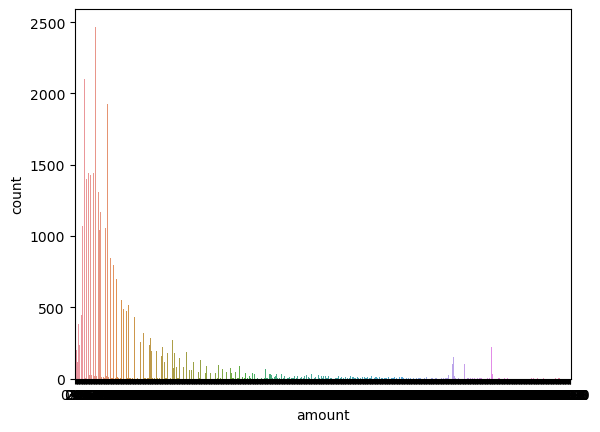

In [11]:
sns.countplot(x="amount",data=data)

<AxesSubplot:xlabel='no_of_passenger', ylabel='Density'>

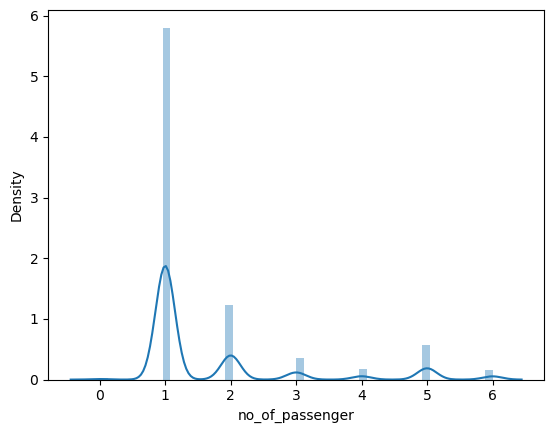

In [12]:
sns.distplot(data["no_of_passenger"])

In [13]:
corr_met=data.corr()

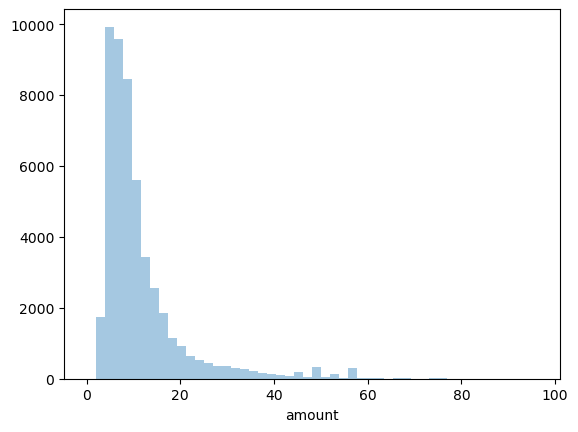

In [14]:
sns.distplot(data[data["amount"] < 100]["amount"], kde=False);

<AxesSubplot:>

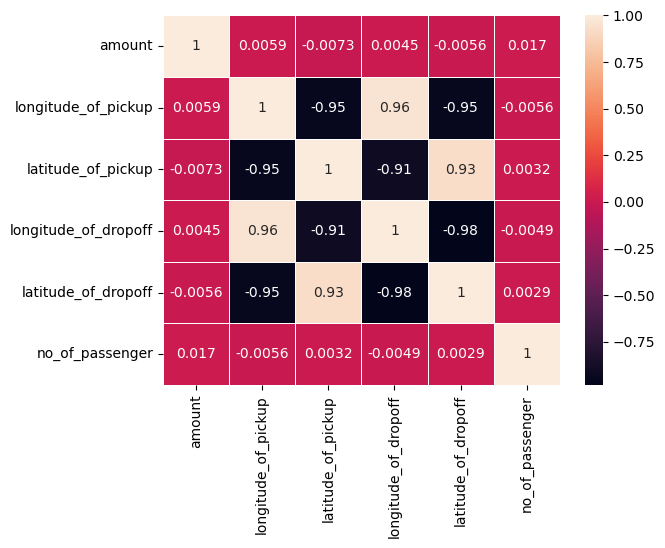

In [15]:
sns.heatmap(corr_met,annot=True,linewidths=0.5)

In [16]:
print(min(data["longitude_of_pickup"].min(), data["longitude_of_dropoff"].min()))

-84.654241


In [17]:
print(max(data["longitude_of_pickup"].max(), data["longitude_of_dropoff"].max()))

40.851027


In [18]:
print(min(data["latitude_of_pickup"].min(), data["latitude_of_dropoff"].min()))

-74.006893


In [19]:
print(max(data["latitude_of_pickup"].max(), data["latitude_of_dropoff"].max()))

401.083332


(-74.03, -73.75)

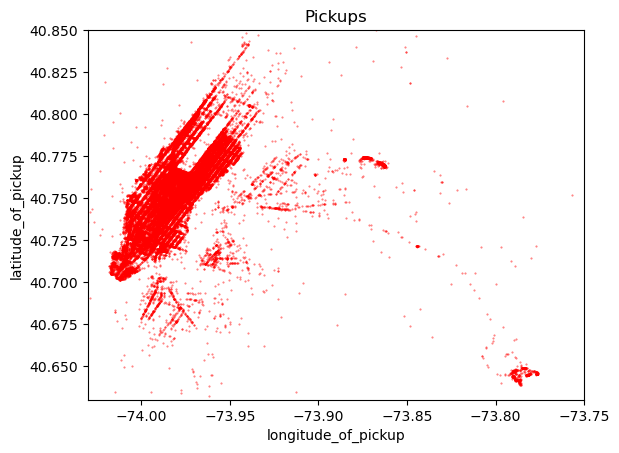

In [20]:
city_long_border = (-74.03,-73.75)
city_lat_border = (40.63,40.85)

data.plot(kind='scatter',x='longitude_of_pickup',y='latitude_of_pickup',color='red',s=0.2,alpha=.6)
plt.title("Pickups")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

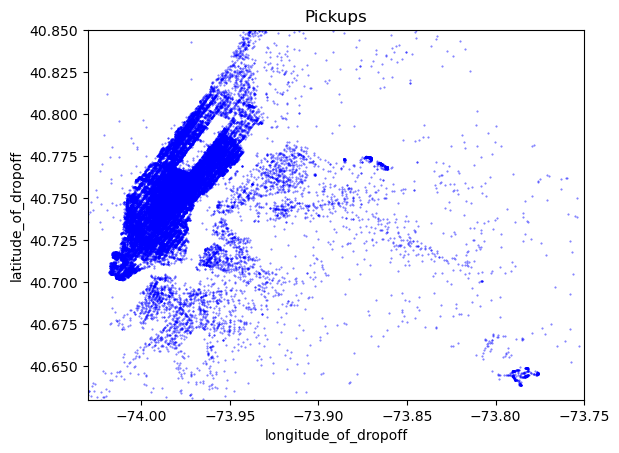

In [21]:
city_long_border = (-74.03,-73.75)
city_lat_border = (40.63,40.85)

data.plot(kind='scatter',x='longitude_of_dropoff',y='latitude_of_dropoff',color='blue',s=0.2,alpha=.6)
plt.title("Pickups")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [22]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [23]:
data["distance_miles"] = distance(data["latitude_of_pickup"], data["longitude_of_pickup"], 
                                      data["latitude_of_dropoff"], data["longitude_of_dropoff"])

In [24]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance_miles
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.640487
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.250670
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863411
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.739386
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.242218


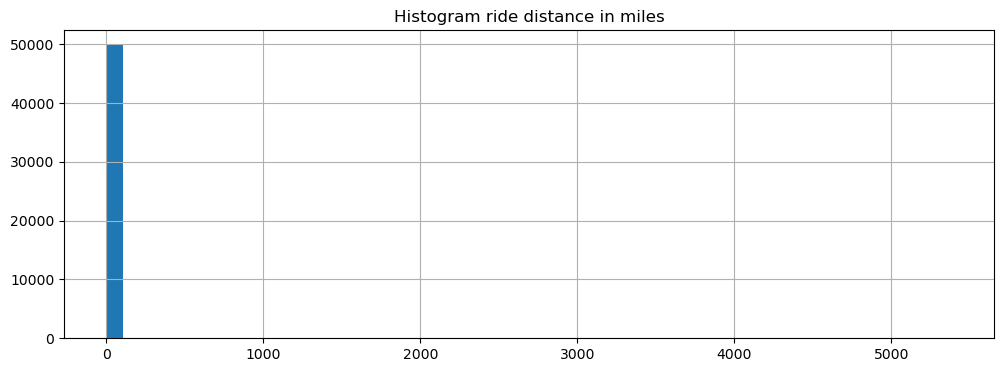

In [25]:
data["distance_miles"].hist(bins=50, figsize=(12,4))
plt.title("Histogram ride distance in miles");

In [26]:
data.drop(['date_time_of_pickup'],axis=1,inplace=True)
data.drop(['unique_id'],axis=1,inplace=True)


data.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.242218


In [27]:
x = data.drop(['amount'],axis=1)
y = data['amount']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [29]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (34995, 6)
Shape of x_test:  (14999, 6)
Shape of y_train:  (34995,)
Shape of y_test:  (14999,)


In [30]:
model_1r = LinearRegression()
model_1r.fit(x_train, y_train)

model_1r.score(x_train, y_train)

0.0006755418379458256

In [31]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(10)
X = np.sort(17 * np.random.rand(17, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 10000, X.shape[0])

regressor = DecisionTreeRegressor(max_depth=10)

regressor.fit(X, y)

X_test = np.arange(1, 17, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_test)

In [32]:
model_1r =  DecisionTreeRegressor()
model_1r.fit(X, y)

model_1r.score(X, y)

1.0

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(x_train, y_train)

y_pred = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 26.25


In [34]:
model_1r =  KNeighborsRegressor()
model_1r.fit(X, y)

model_1r.score(X, y)

0.0853620439597722

In [35]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svm_regressor = SVR(kernel='rbf', C=100, gamma='auto')

svm_regressor.fit(x_train, y_train)

y_pred = svm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 25.52


In [36]:
model_1r =  SVR()
model_1r.fit(X, y)

model_1r.score(X, y)

-0.007598615203046721

In [37]:
from sklearn.ensemble import BaggingRegressor

np.random.seed(42)

base_regressor = DecisionTreeRegressor(max_depth=5)

bagging_regressor = BaggingRegressor(base_regressor, n_estimators=10, random_state=42)

bagging_regressor.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = bagging_regressor.predict(X_test)

In [38]:
model_1r = BaggingRegressor()
model_1r.fit(X, y)

model_1r.score(X, y)

0.72738021701023

In [39]:
from sklearn.ensemble import AdaBoostRegressor

np.random.seed(42)

base_regressor = DecisionTreeRegressor(max_depth=5)
adaboost_regressor = AdaBoostRegressor(base_regressor, n_estimators=50, random_state=42)

adaboost_regressor.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = adaboost_regressor.predict(X_test)

In [40]:
model_1r = AdaBoostRegressor()
model_1r.fit(X, y)

model_1r.score(X, y)

0.9236276606216359

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gradient_boosting_regressor.fit(X_train, y_train)
y_pred = gradient_boosting_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

X_test_sorted = np.sort(X_test, axis=0)
y_pred_sorted = gradient_boosting_regressor.predict(X_test_sorted)

Mean Squared Error: 37104401.37549476


In [42]:
model_1r = GradientBoostingRegressor()
model_1r.fit(X_train, y_train)

model_1r.score(X_train, y_train)

0.9997278203550702

In [43]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)


random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

random_forest_regressor.fit(X_train, y_train)

y_pred = random_forest_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

X_test_sorted = np.sort(X_test, axis=0)
y_pred_sorted = random_forest_regressor.predict(X_test_sorted)

Mean Squared Error: 70529116.00980084


In [44]:
model_1r = RandomForestRegressor()
model_1r.fit(X_train, y_train)

model_1r.score(X_train, y_train)

0.6881610375266304